In [1]:
! pip install keras

  Using cached https://files.pythonhosted.org/packages/ad/fd/6bfe87920d7f4fd475acd28500a42482b6b84479832bdc0fe9e589a60ceb/Keras-2.3.1-py2.py3-none-any.whl
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [20]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [29]:
# Neural network
model = Sequential()
model.add(Dense(22, input_dim = 11, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(22, input_dim = 11, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(44, input_dim = 11, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(80, input_dim = 11, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(80, activation = 'softmax'))

<h2>Load Data</h2>

In [4]:
import io
import pickle
import boto3

s3_client = boto3.client('s3')

In [8]:
# download without using disk
my_array_data2 = io.BytesIO()
s3_client.download_fileobj('bme-bucket', 'engineered_data/Y_minmaxscaled.pkl', my_array_data2)
my_array_data2.seek(0)
Y = pickle.load(my_array_data2)

my_array_data2 = io.BytesIO()
s3_client.download_fileobj('bme-bucket', 'engineered_data/X.pkl', my_array_data2)
my_array_data2.seek(0)
X = pickle.load(my_array_data2)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

<h2>Train Model</h2>

In [32]:
model.compile(loss='mse', optimizer='adam')

history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=500, batch_size=32)

Train on 53532 samples, validate on 26367 samples
Epoch 1/500
53532/53532 [==============================] - 16s 292us/step - loss: 0.1420 - val_loss: 0.1429
Epoch 2/500
53532/53532 [==============================] - 14s 258us/step - loss: 0.1420 - val_loss: 0.1429
Epoch 3/500
53532/53532 [==============================] - 15s 277us/step - loss: 0.1420 - val_loss: 0.1429
Epoch 4/500
53532/53532 [==============================] - 14s 266us/step - loss: 0.1420 - val_loss: 0.1429
Epoch 5/500
53532/53532 [==============================] - 14s 263us/step - loss: 0.1420 - val_loss: 0.1429
Epoch 6/500
53532/53532 [==============================] - 15s 272us/step - loss: 0.1420 - val_loss: 0.1429
Epoch 7/500
53532/53532 [==============================] - 6s 115us/step - loss: 0.1420 - val_loss: 0.1429
Epoch 8/500
53532/53532 [==============================] - 3s 52us/step - loss: 0.1420 - val_loss: 0.1429
Epoch 9/500
53532/53532 [==============================] - 3s 52us/step - loss: 0.1420 - 

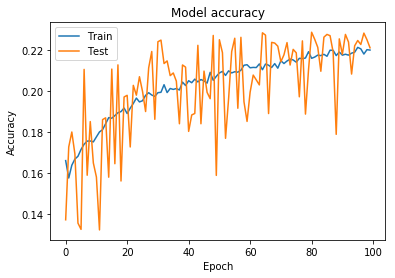

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

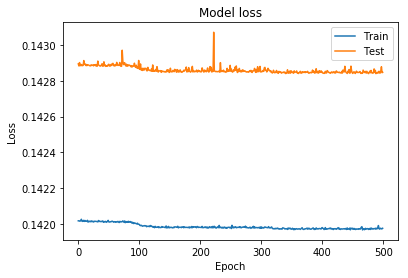

In [33]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

<h2>Save Model</h2>

In [ ]:
import boto3

# Convert your existing model to JSON
saved_model = model.to_json()

# Write JSON object to S3 as "keras-model.json"
client = boto3.client('s3')
client.put_object(Body=saved_model,
                  Bucket='BUCKET_NAME',
                  Key='keras-model.json')

In [ ]:
from keras.models import model_from_json

# Read the downloaded JSON file
with open('keras-model.json', 'r') as model_file:
   loaded_model = model_file.read()

# Convert back to Keras model
model = model_from_json(loaded_model)

# Confirmation
model.summary()